<a href="https://colab.research.google.com/github/Lplus0/COMP7404_1A/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io as sio
variable_names = sio.whosmat('/content/drive/MyDrive/Colab Notebooks/all_data_DriveEnd.mat')
for variable in variable_names:
    print(variable)

('BA_007_0', (122571, 1), 'double')
('BA_007_1', (121410, 1), 'double')
('BA_007_2', (121556, 1), 'double')
('BA_007_3', (121556, 1), 'double')
('BA_014_0', (121846, 1), 'double')
('BA_014_1', (122136, 1), 'double')
('BA_014_2', (121991, 1), 'double')
('BA_014_3', (122136, 1), 'double')
('BA_021_0', (121991, 1), 'double')
('BA_021_1', (121701, 1), 'double')
('BA_021_2', (122136, 1), 'double')
('BA_021_3', (122136, 1), 'double')
('IR_007_0', (121265, 1), 'double')
('IR_007_1', (121991, 1), 'double')
('IR_007_2', (122136, 1), 'double')
('IR_007_3', (122917, 1), 'double')
('IR_014_0', (121846, 1), 'double')
('IR_014_1', (121846, 1), 'double')
('IR_014_2', (121846, 1), 'double')
('IR_014_3', (121701, 1), 'double')
('IR_021_0', (122136, 1), 'double')
('IR_021_1', (121556, 1), 'double')
('IR_021_2', (121846, 1), 'double')
('IR_021_3', (121991, 1), 'double')
('NM_0', (243938, 1), 'double')
('NM_1', (483903, 1), 'double')
('NM_2', (485063, 1), 'double')
('NM_3', (485643, 1), 'double')
('OR_007

In [2]:
import os
import sys
import random
import warnings
import tensorflow as tf
import numpy as np

import scipy.io as sio
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import activations
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

In [3]:
# def conv1d_bn_relu_maxpool(x, filters, kernel_size, padding, strides):
#     xx = Conv1D(filters=filters, kernel_size=kernel_size, padding=padding, strides=strides)(x)
#     # 该函数创建一个1D卷积层。它接受过滤器数量、内核大小、填充和步幅等参数。
#     xx = BatchNormalization()(xx)
#     # 此函数对输入数据执行批量标准化。它通过规范化输入数据有助于提高训练的稳定性和速度
#     xx = Activation('relu')(xx)
#     # 此函数将激活函数应用于输入数据。在这种情况下，使用“relu”激活函数，它代表修正线性单元
#     xx = MaxPooling1D(pool_size=2)(xx)
#     # 此函数对输入数据执行最大池化。它通过取指定池大小内的最大值来减少输入的空间维度

#     return xx


In [4]:
def normalization_processing(data):
    data_mean = data.mean()
    data_var = data.var()

    data = data - data_mean
    data = data / data_var

    return data

In [5]:
def MSC_1DCNN(datashape=(8192,1) , class_number = 10):
    # 一维卷积神经网络 (CNN) 模型
    input_signal = Input(shape=(8192, 1))
    # 它采用形状为(8192, 1) 的输入信号，并应用具有不同内核大小和步幅的多个并行一维卷积层
    # 多个并行一维卷积层
    x1 = Conv1D(filters=1, kernel_size=2, padding='valid', strides=2)(input_signal)
    x1 = MaxPooling1D(pool_size=256)(x1)
    x2 = Conv1D(filters=1, kernel_size=4, padding='valid', strides=4)(input_signal)
    x2 = MaxPooling1D(pool_size=128)(x2)
    x3 = Conv1D(filters=1, kernel_size=8, padding='valid', strides=8)(input_signal)
    x3 = MaxPooling1D(pool_size=64)(x3)
    x4 = Conv1D(filters=1, kernel_size=16, padding='valid', strides=16)(input_signal)
    x4 = MaxPooling1D(pool_size=32)(x4)
    x5 = Conv1D(filters=1, kernel_size=32, padding='valid', strides=32)(input_signal)
    x5 = MaxPooling1D(pool_size=16)(x5)
    x6 = Conv1D(filters=1, kernel_size=64, padding='valid', strides=64)(input_signal)
    x6 = MaxPooling1D(pool_size=8)(x6)
    x7 = Conv1D(filters=1, kernel_size=128, padding='valid', strides=128)(input_signal)
    x7 = MaxPooling1D(pool_size=4)(x7)
    x8 = Conv1D(filters=1, kernel_size=256, padding='valid', strides=256)(input_signal)
    x8 = MaxPooling1D(pool_size=2)(x8)

    xx = concatenate([x1, x2, x3, x4, x5, x6, x7, x8], axis=-2)
    # 这些层的输出沿着最后一个轴连接起来。
    xx = Flatten()(xx)
    xx = Dense(128, activation='relu')(xx)
    # 连接的输出被展平并通过具有 128个单元和ReLU激活的密集层
    output = Dense(10, activation='softmax')(xx)
    # 包含10个单元和softmax激活的密集层，它表示每个类别的输出概率
    model = Model(inputs=input_signal, outputs=output)

    return model




In [12]:
my_model = MSC_1DCNN(datashape=(8192,1) , class_number = 10)

datafile_path = '/content/drive/MyDrive/Colab Notebooks/all_data_DriveEnd.mat'
data = sio.loadmat(datafile_path)
category_list = ['NM','BA_007','BA_014','BA_021','OR_007','OR_014','OR_021','IR_007','IR_014','IR_021']
# category_list = ['NM','BA_014','OR_014','IR_014']

X_train = []
y_train = []
X_test1  = []
y_test1  = []
sample_length = 8192

sample_num_each_signal = 100 # in training data or testing data, each full signal actually generates 200 samples.
start_idx = np.int64(np.round(np.linspace(0,60000-sample_length,sample_num_each_signal)))
# start_idx = list(range(0,60000-sample_length+1,round(60000/sample_num_each_signal)))
for i in range(10):
    this_ctgr = category_list[i]

    for j in range(4):# dongli
        key_name = this_ctgr + '_' + str(j)
        this_ctgr_data_j = data[key_name]

        [X_train.append(this_ctgr_data_j[k:k+sample_length]) for k in start_idx]
        [y_train.append(i) for k in start_idx]
        # y_train.append(i)
        [X_test1.append(this_ctgr_data_j[k+60001:k+60001+sample_length]) for k in start_idx]
        [y_test1.append(i) for k in start_idx]
        # y_test.append(i)


# print(len (X_train), len(X_test1))
X_train = np.squeeze(np.array(X_train))
X_test1 = np.squeeze(np.array(X_test1))


X_valid, X_test, y_valid, y_test = train_test_split(X_test1, y_test1, test_size=0.75, random_state=42)


X_train = np.array([normalization_processing(data) for data in X_train])
X_train = np.expand_dims(X_train,axis=2)
y_train_one_hot = to_categorical(np.array(y_train), len(category_list))


X_test = np.array([normalization_processing(data) for data in X_test])
X_test = np.expand_dims(X_test,axis=2)
y_test_one_hot = to_categorical(np.array(y_test), len(category_list))


X_valid = np.array([normalization_processing(data) for data in X_valid])
X_valid = np.expand_dims(X_valid,axis=2)
y_valid_one_hot = to_categorical(np.array(y_valid), len(category_list))


# configure training
opt = tf.keras.optimizers.Adam(lr = 0.01)
my_model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=0.0000001)
history_callback = History()
history = my_model.fit(
    x = X_train,
    y = y_train_one_hot ,
    batch_size = 32,
    epochs = 180,# times
    validation_data = (X_valid, y_valid_one_hot),
    shuffle=True,
    verbose = 1,
    # verbose = 0
    callbacks=[history_callback]

)

y_pred = my_model.predict(X_test) #shape: 22313*7 #y_test:22313*1
y_pred = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_test, y_pred)

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print(acc)



Epoch 1/180
125/125 [==============================] - 12s 76ms/step - loss: 3.2614 - accuracy: 0.3162 - val_loss: 1.6013 - val_accuracy: 0.4380
Epoch 2/180
125/125 [==============================] - 9s 69ms/step - loss: 1.0506 - accuracy: 0.6315 - val_loss: 0.7475 - val_accuracy: 0.7550
Epoch 3/180
125/125 [==============================] - 6s 52ms/step - loss: 0.4980 - accuracy: 0.8415 - val_loss: 0.3775 - val_accuracy: 0.8640
Epoch 4/180
125/125 [==============================] - 10s 80ms/step - loss: 0.2753 - accuracy: 0.9160 - val_loss: 0.2561 - val_accuracy: 0.9140
Epoch 5/180
125/125 [==============================] - 6s 52ms/step - loss: 0.1806 - accuracy: 0.9445 - val_loss: 0.2137 - val_accuracy: 0.9350
Epoch 6/180
125/125 [==============================] - 10s 81ms/step - loss: 0.1311 - accuracy: 0.9595 - val_loss: 0.2291 - val_accuracy: 0.9080
Epoch 7/180
125/125 [==============================] - 7s 52ms/step - loss: 0.0850 - accuracy: 0.9768 - val_loss: 0.1421 - val_accura

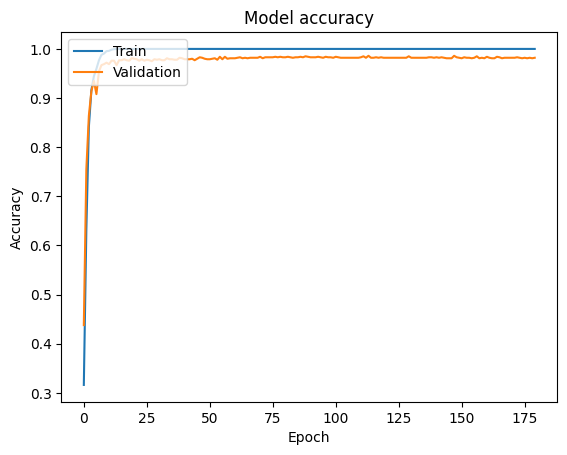

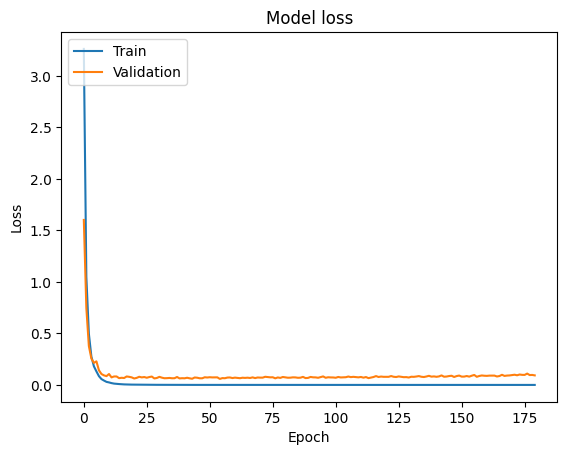

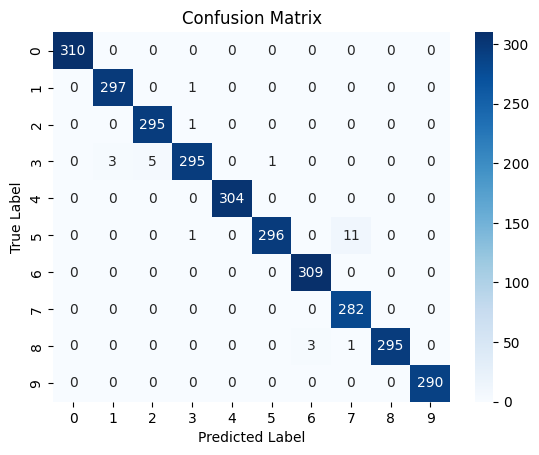

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 绘制训练和验证准确率和损失的曲线图
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

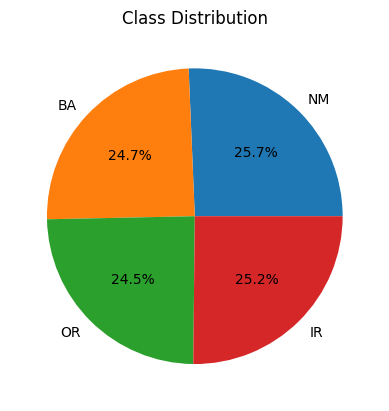

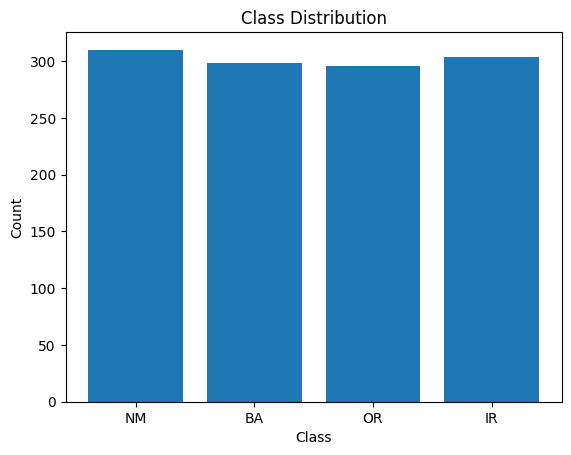

In [14]:
import matplotlib.pyplot as plt

# 计算每个大类的数量
class_counts = {'NM': 0, 'BA': 0, 'OR': 0, 'IR': 0}
for label in y_test:
    if label == 0:
        class_counts['NM'] += 1
    elif label == 1:
        class_counts['BA'] += 1
    elif label == 2:
        class_counts['OR'] += 1
    elif label == 3:
        class_counts['IR'] += 1

# 绘制饼图
labels = class_counts.keys()
sizes = class_counts.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

# 绘制柱状图
plt.bar(labels, sizes)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
my_model = MSC_1DCNN()
my_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8192, 1)]            0         []                            
                                                                                                  
 conv1d_8 (Conv1D)           (None, 4096, 1)              3         ['input_2[0][0]']             
                                                                                                  
 conv1d_9 (Conv1D)           (None, 2048, 1)              5         ['input_2[0][0]']             
                                                                                                  
 conv1d_10 (Conv1D)          (None, 1024, 1)              9         ['input_2[0][0]']             
                                                                                            

# 新段落

# 新段落